## **EDA 1**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [ ]:
import pandas as pd

df = pd.read_csv('BIKE DETAILS.csv')
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
# 1 What is the range of selling prices in the dataset
min_price=  df['selling_price'].min()
max_price=  df['selling_price'].max()

print("Range of Selling Prices: ₹", min_price, "to ₹", max_price)

Range of Selling Prices: ₹ 5000 to ₹ 760000


In [ ]:
#2 What is the median selling price for bikes in the dataset
min_price=  df['selling_price'].median()
print("Median Selling Price: ₹", min_price)

Median Selling Price: ₹ 45000.0


In [ ]:
#3 What is the most common seller type
Common_price = df['selling_price'].mode()[0]
print("Most Common Selling Price: ₹", Common_price)

Most Common Selling Price: ₹ 25000


In [ ]:
# 4 How many bikes have driven more than 50,000 kilometers?
Drive = (df['km_driven']> 5000).sum
print("Number of bikes driven more than 50,000 km:", Drive)

Number of bikes driven more than 50,000 km: <bound method Series.sum of 0       False
1        True
2        True
3        True
4        True
        ...  
1056     True
1057     True
1058     True
1059     True
1060     True
Name: km_driven, Length: 1061, dtype: bool>


In [ ]:
#5 What is the average km_driven value for each ownership type
average_km_driven = df.groupby('owner')['km_driven'].mean()
print("Average km_driven value for each ownership type:")
print(average_km_driven)

Average km_driven value for each ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
# 6 What proportion of bikes are from the year 2015 or older
older_bikes = (df['year'] <= 2015).sum()
total_bikes = len(df)
proportion = older_bikes / total_bikes
print("Proportion of bikes from the year 2015 or older:", proportion)


Proportion of bikes from the year 2015 or older: 0.5664467483506126


In [ ]:
#7 What is the trend of missing values across the dataset
missing_values = df.isnull().sum()
print("Trend of missing values across the dataset:")
print(missing_values)

Trend of missing values across the dataset:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [ ]:
#8 What is the highest ex_showroom_price recorded, and for which bike
highest_price = df[df['ex_showroom_price'] == df['ex_showroom_price'].max()]
print("Highest ex_showroom_price recorded:")
print(highest_price)

Highest ex_showroom_price recorded:
                           name  selling_price  year seller_type      owner  \
134  Harley-Davidson Street Bob         750000  2013  Individual  2nd owner   

     km_driven  ex_showroom_price  
134      12000          1278000.0  


In [ ]:
#9 What is the total number of bikes listed by each seller type?
bike_count = df['seller_type'].value_counts()
print("Total number of bikes listed by each seller type:")
print(bike_count)

Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [ ]:
#10 What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_bikes = df[df['owner'] == 'First Owner']
correlation = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])
print("Relationship between selling_price and km_driven for first-owner bikes:")
print

Relationship between selling_price and km_driven for first-owner bikes:


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [ ]:
#11 Identify and remove outliers in the km_driven column using the IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[(df['km_driven'] >= Q1 - 1.5 * IQR) & (df['km_driven'] <= Q3 + 1.5 * IQR)]
print("Shape after removing outliers:", df_no_outliers.shape)

Shape after removing outliers: (1022, 7)


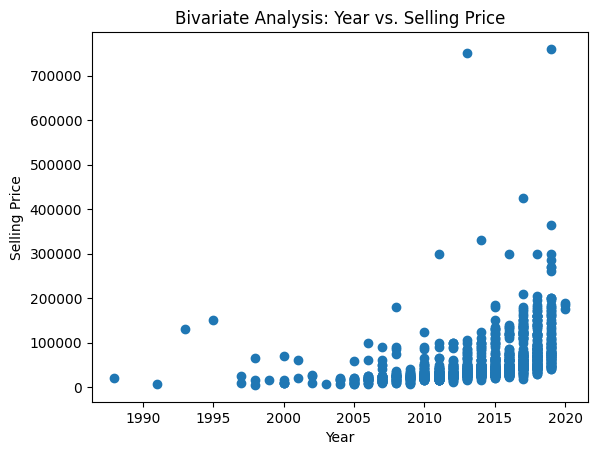

In [ ]:
#12  Perform a bivariate analysis to visualize the relationship between year and selling_price
import matplotlib.pyplot as plt
plt.scatter(df['year'], df['selling_price'])
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Bivariate Analysis: Year vs. Selling Price')
plt.show()

In [ ]:
#13 What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)
from datetime import datetime
current_year = datetime.now().year
df['age'] = current_year - df['year']
df = df.dropna(subset=['ex_showroom_price', 'selling_price', 'age'])
df['depreciation'] = (df['ex_showroom_price'] - df['selling_price']) / df['age']

avg_depreciation_by_age = df.groupby('age')['depreciation'].mean().round(2)
print(avg_depreciation_by_age)


age
5    -6852.00
6      492.43
7     1860.46
8     2788.26
9     3147.58
10    2801.33
11    3136.87
12    3590.57
13    2870.59
14    3364.48
15    3043.93
16    2389.24
17    3219.55
18    2355.50
19    2087.61
20    2242.60
21    1754.86
24    1452.17
Name: depreciation, dtype: float64


<ipython-input-22-4ae384609f4c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['depreciation'] = (df['ex_showroom_price'] - df['selling_price']) / df['age']


In [ ]:
#14 Which bike names are priced significantly above the average price for their manufacturing year
year_avg_price = df.groupby('year')['selling_price'].mean()
df['above_avg'] = df.apply(lambda x: x['selling_price'] > year_avg_price.loc[x['year']], axis=1)
above_avg_bikes = df[df['above_avg']]
print("14. Bikes Above Avg Price in Their Year:\n", above_avg_bikes[['name', 'year', 'selling_price']].head())

14. Bikes Above Avg Price in Their Year:
                                    name  year  selling_price
2   Royal Enfield Classic Gunmetal Grey  2018         150000
3     Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
13                        Yamaha YZF R3  2019         365000
17                     Yamaha YZF R15 S  2010          40000
18  Royal Enfield Classic Gunmetal Grey  2018         150000


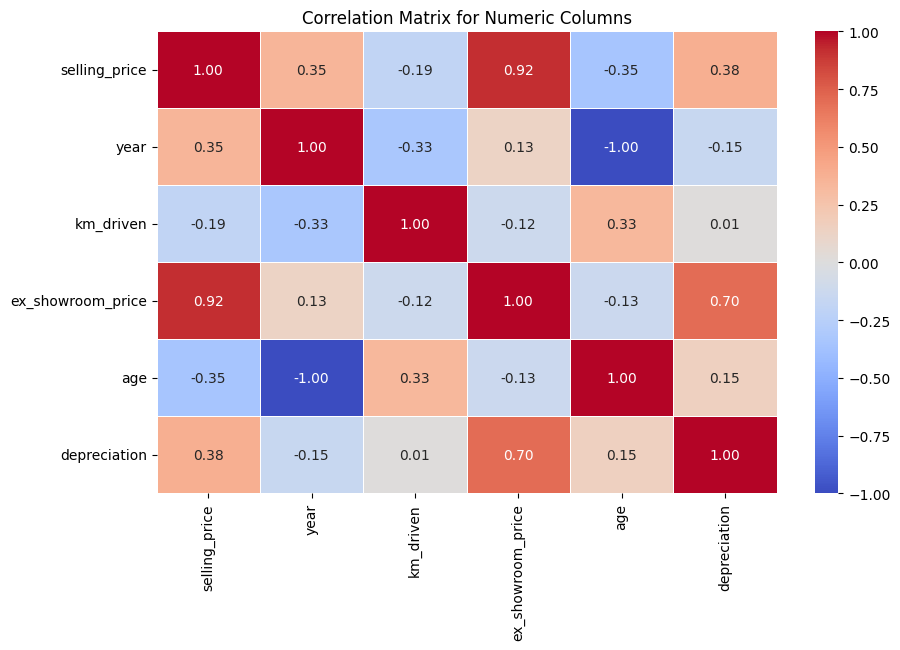

In [ ]:
 #15 Develop a correlation matrix for numeric columns and visualize it using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix for Numeric Columns")
plt.show()



## EDA - **2**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Car Sale.csv to Car Sale.csv


In [ ]:
import pandas as pd
car_df = pd.read_csv('Car Sale.csv')
car_df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
#1 What is the average selling price of cars for each dealer, and how does it compare across different dealers?
avg_price_by_dealer = car_df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
avg_price_by_dealer.head(10)


,Price ($)
Dealer_Name,
U-Haul CO,28769.919006
Classic Chevy,28602.014446
Rabun Used Car Sales,28527.536177
Iceberg Rentals,28522.958533
Enterprise Rent A Car,28312.580800
Scrivener Performance Engineering,28297.371589
Gartner Buick Hyundai Saab,28247.621019
Saab-Belle Dodge,28190.139888
Capitol KIA,28189.703822


<ipython-input-42-7e2348e615f4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=car_df, x='Transmission', y='Price ($)', palette="Set2")


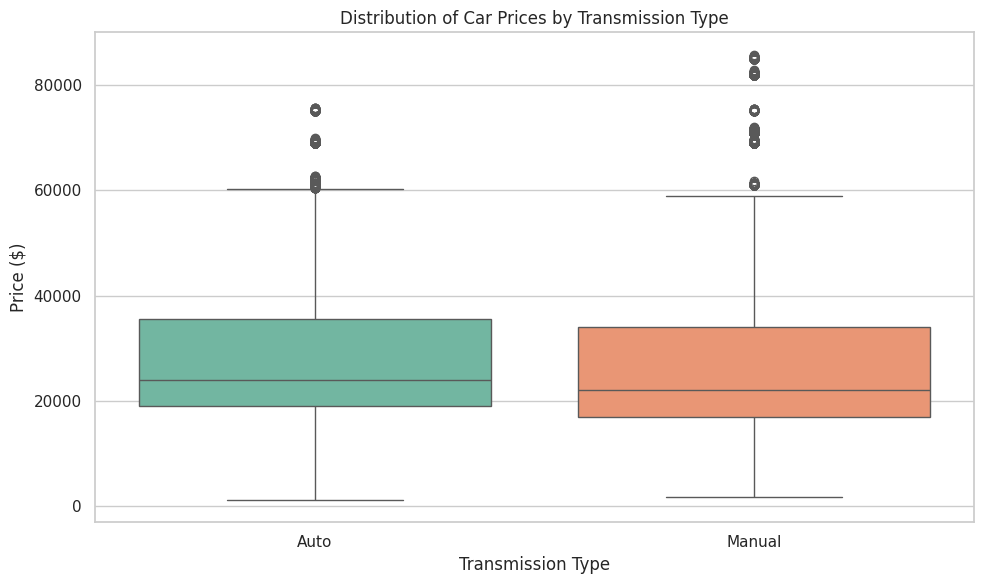

In [ ]:
#2Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set(style="whitegrid")

# Create a boxplot to visualize price distribution by transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(data=car_df, x='Transmission', y='Price ($)', palette="Set2")
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()


In [ ]:
#3 What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare
# Summary stats for car prices grouped by Transmission type
transmission_summary = car_df.groupby('Transmission')['Price ($)'].describe()[['25%', '50%', '75%']]
transmission_summary['IQR'] = transmission_summary['75%'] - transmission_summary['25%']
transmission_summary



,25%,50%,75%,IQR
Transmission,,,,
Auto,19000.0,24000.0,35500.0,16500.0
Manual,17000.0,22001.0,34000.0,17000.0


In [ ]:
#4 What is the distribution of car prices across different regions?
region_price_summary = car_df.groupby('Dealer_Region')['Price ($)'].describe()[['count', 'mean', 'min', '25%', '50%', '75%', 'max']]
region_price_summary = region_price_summary.sort_values(by='mean', ascending=False)
region_price_summary



,count,mean,min,25%,50%,75%,max
Dealer_Region,,,,,,,
Austin,4135.0,28341.603628,9000.0,18001.0,23801.0,35001.0,85601.0
Aurora,3130.0,28334.626837,9000.0,18001.0,23000.0,35000.0,85800.0
Greenville,3128.0,28180.819054,1200.0,18001.0,22500.0,34500.0,85200.0
Pasco,3131.0,28119.039923,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,1450.0,18000.0,22600.0,33500.0,85001.0
Middletown,3128.0,27856.338875,1700.0,18000.0,22750.0,34000.0,85300.0
Janesville,3821.0,27833.350955,4300.0,18001.0,23000.0,34000.0,85400.0


In [ ]:
#5 What is the distribution of cars based on body styles

body_style_distribution = car_df['Body Style'].value_counts()
body_style_distribution


,count
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


In [ ]:
#6 How does the average selling price of cars vary by customer gender and annual income
avg_price_by_gender = car_df.groupby('Gender')['Price ($)'].mean().round(2)
avg_price_by_gender

bins = [0, 30000, 60000, 90000, 120000, 150000, float('inf')]
labels = ['<30K', '30K–60K', '60K–90K', '90K–120K', '120K–150K', '150K+']
car_df['Income_Bracket'] = pd.cut(car_df['Annual Income'], bins=bins, labels=labels)

avg_price_by_income = car_df.groupby('Income_Bracket')['Price ($)'].mean().round(2)
avg_price_by_income


<ipython-input-46-f6209d051db1>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income = car_df.groupby('Income_Bracket')['Price ($)'].mean().round(2)


,Price ($)
Income_Bracket,
<30K,27884.30
30K–60K,NaN
60K–90K,43000.00
90K–120K,46001.00
120K–150K,17500.00
150K+,28149.09


In [ ]:
#7 What is the distribution of car prices by region, and how does the number of cars sold vary by region
# Grouping to get descriptive statistics of Price ($) by region
price_distribution_region = car_df.groupby('Dealer_Region')['Price ($)'].describe().round(2)
print("Price Distribution by Region:\n")
print(price_distribution_region)

# Number of cars sold (count) by region
car_sales_count = car_df['Dealer_Region'].value_counts()
print("\nNumber of Cars Sold by Region:\n")
print(car_sales_count)



Price Distribution by Region:

                count      mean       std     min      25%      50%      75%  \
Dealer_Region                                                                  
Aurora         3130.0  28334.63  15026.21  9000.0  18001.0  23000.0  35000.0   
Austin         4135.0  28341.60  14903.88  9000.0  18001.0  23801.0  35001.0   
Greenville     3128.0  28180.82  15101.54  1200.0  18001.0  22500.0  34500.0   
Janesville     3821.0  27833.35  14345.00  4300.0  18001.0  23000.0  34000.0   
Middletown     3128.0  27856.34  14619.84  1700.0  18000.0  22750.0  34000.0   
Pasco          3131.0  28119.04  14659.32  9000.0  18500.5  23000.0  34000.0   
Scottsdale     3433.0  27954.96  14902.92  1450.0  18000.0  22600.0  33500.0   

                   max  
Dealer_Region           
Aurora         85800.0  
Austin         85601.0  
Greenville     85200.0  
Janesville     85400.0  
Middletown     85300.0  
Pasco          85600.0  
Scottsdale     85001.0  

Number of Cars Sold by

In [ ]:
#8 How does the average car price differ between cars with different engine sizes?
# Group by Engine and calculate average Price
avg_price_by_engine = car_df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False).round(2)

print("Average Car Price by Engine Size:\n")
print(avg_price_by_engine)



Average Car Price by Engine Size:

Engine
DoubleÂ Overhead Camshaft    28248.53
Overhead Camshaft            27914.71
Name: Price ($), dtype: float64


In [ ]:
#9 How do car prices vary based on the customer’s annual income bracket
# Create income brackets
bins = [0, 30000, 60000, 90000, 120000, 150000, float('inf')]
labels = ['<30K', '30K-60K', '60K-90K', '90K-120K', '120K-150K', '150K+']

car_df['Income_Bracket'] = pd.cut(car_df['Annual Income'], bins=bins, labels=labels)

# Group by Income Bracket and calculate average car price
avg_price_by_income = car_df.groupby('Income_Bracket')['Price ($)'].mean().round(2)

print("Average Car Price by Customer Income Bracket:\n")
print(avg_price_by_income)


Average Car Price by Customer Income Bracket:

Income_Bracket
<30K         27884.30
30K-60K           NaN
60K-90K      43000.00
90K-120K     46001.00
120K-150K    17500.00
150K+        28149.09
Name: Price ($), dtype: float64


<ipython-input-11-9e44da74175e>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income = car_df.groupby('Income_Bracket')['Price ($)'].mean().round(2)


In [ ]:
#10  What are the top 5 car models with the highest number of sales, and how does their price distribution look?

bins = [0, 30000, 60000, 90000, 120000, 150000, float('inf')]
labels = ['<30K', '30K-60K', '60K-90K', '90K-120K', '120K-150K', '150K+']

car_df['Income_Bracket'] = pd.cut(car_df['Annual Income'], bins=bins, labels=labels)


avg_price_by_income = car_df.groupby('Income_Bracket')['Price ($)'].mean().round(2)

print("Average Car Price by Customer Income Bracket:\n")
print(avg_price_by_income)


Average Car Price by Customer Income Bracket:

Income_Bracket
<30K         27884.30
30K-60K           NaN
60K-90K      43000.00
90K-120K     46001.00
120K-150K    17500.00
150K+        28149.09
Name: Price ($), dtype: float64


<ipython-input-12-90f8695a916c>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income = car_df.groupby('Income_Bracket')['Price ($)'].mean().round(2)


In [ ]:
#11 How does car price vary with engine size across different car colors, and which colors have the highest price variation
price_variation_by_color = car_df.groupby('Color')['Price ($)'].std().sort_values(ascending=False).round(2)

print("Price Variation by Car Color (Standard Deviation):\n")
print(price_variation_by_color)

avg_price_engine_color = car_df.groupby(['Color', 'Engine'])['Price ($)'].mean().round(2)

print("\nAverage Car Price by Engine Size and Color:\n")
print(avg_price_engine_color)


Price Variation by Car Color (Standard Deviation):

Color
Red           15519.36
Black         15286.07
Pale White    14077.35
Name: Price ($), dtype: float64

Average Car Price by Engine Size and Color:

Color       Engine                   
Black       DoubleÂ Overhead Camshaft    25766.45
            Overhead Camshaft            31732.97
Pale White  DoubleÂ Overhead Camshaft    30347.99
            Overhead Camshaft            24327.77
Red         DoubleÂ Overhead Camshaft    27434.39
            Overhead Camshaft            30153.41
Name: Price ($), dtype: float64


In [ ]:
#12  Is there any seasonal trend in car sales based on the date of saleE
# Convert 'Date' column to datetime format
car_df['Date'] = pd.to_datetime(car_df['Date'])

# Extract month from Date
car_df['Month'] = car_df['Date'].dt.month_name()

# Count number of sales per month
monthly_sales = car_df['Month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

print("Monthly Car Sales Distribution:\n")
print(monthly_sales)


Monthly Car Sales Distribution:

Month
January       790
February      735
March        1535
April        1655
May          1895
June         1715
July         1725
August       1705
September    3305
October      1830
November     3470
December     3546
Name: count, dtype: int64


In [ ]:
#13 How does the car price distribution change when considering different combinations of body style and transmission type
# Grouping by body style and transmission type
price_by_body_trans = car_df.groupby(['Body Style', 'Transmission'])['Price ($)'].describe().round(2)

print("Car Price Distribution by Body Style and Transmission:\n")
print(price_by_body_trans[['count', 'mean', 'min', '25%', '50%', '75%', 'max']])


Car Price Distribution by Body Style and Transmission:

                          count      mean      min      25%      50%      75%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.19  12000.0  21001.0  27000.0  43125.0   
           Manual        1563.0  27016.94  11000.0  17575.5  22001.0  29000.0   
Hatchback  Auto          3458.0  25910.54   4200.0  18001.0  21500.0  31000.0   
           Manual        2670.0  28702.55   1700.0  17000.0  23000.0  36001.0   
Passenger  Auto          2020.0  28915.84   9000.0  19000.0  25000.0  38000.0   
           Manual        1925.0  28969.52  10000.0  16001.0  22000.0  37000.0   
SUV        Auto          3086.0  27501.40   1200.0  19000.0  25000.0  33000.0   
           Manual        3288.0  26079.02   2200.0  17000.0  22000.0  28000.0   
Sedan      Auto          2599.0  29955.29  12000.0  19000.0  26000.0  39500.0   
           Manual        1889.0  29664.27  11000.0  1

In [ ]:
#14 What is the correlation between car price, engine size, and annual income of customers, and how do these features interact

print(car_df['Engine'].unique())

# Use only numeric columns
numeric_cols = ['Price ($)', 'Annual Income']

correlation_df = car_df[numeric_cols].dropna()

# Calculate correlation
correlation_matrix = correlation_df.corr().round(2)

print("Correlation Matrix:")
print(correlation_matrix)




['DoubleÂ\xa0Overhead Camshaft' 'Overhead Camshaft']
Correlation Matrix:
               Price ($)  Annual Income
Price ($)           1.00           0.01
Annual Income       0.01           1.00


In [ ]:
#15 How does the average car price vary across different car models and engine types

avg_price_by_model_engine = car_df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
avg_price_by_model_engine = avg_price_by_model_engine.sort_values(by='Price ($)', ascending=False)
print(avg_price_by_model_engine.head(10))


           Model                     Engine     Price ($)
212           SC          Overhead Camshaft  61074.818182
198       Ranger  DoubleÂ Overhead Camshaft  61064.055556
222        Sable          Overhead Camshaft  61039.770833
56        Catera  DoubleÂ Overhead Camshaft  56836.933333
143        LX470          Overhead Camshaft  54037.490196
139        LS400          Overhead Camshaft  53157.941558
111        GS400          Overhead Camshaft  53086.000000
239       Tacoma  DoubleÂ Overhead Camshaft  53085.821918
25        Aurora          Overhead Camshaft  51833.556962
173  Park Avenue  DoubleÂ Overhead Camshaft  49387.750000


# **EDA** **3**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving amazon.csv to amazon.csv


In [5]:
import pandas as pd

amazon_df = pd.read_csv('amazon.csv')
amazon_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [8]:
#1.  What is the average rating for each product category
# Convert 'rating' to numeric, forcing invalid values to NaN
amazon_df['rating'] = pd.to_numeric(amazon_df['rating'], errors='coerce')

# Group by 'category' and calculate average rating
avg_rating_by_category = amazon_df.groupby('category')['rating'].mean().sort_values(ascending=False)

# Show the result
print(avg_rating_by_category)


category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Accessories&Peripherals|Audio&Vid

In [9]:
#2 What are the top rating_count products by category
# Ensure rating_count is numeric
amazon_df['rating_count'] = pd.to_numeric(amazon_df['rating_count'], errors='coerce')

# Drop rows with missing values in necessary columns
amazon_df_clean = amazon_df.dropna(subset=['category', 'product_name', 'rating_count'])

# For each category, get the product with the highest rating count
top_rated_products = amazon_df_clean.loc[
    amazon_df_clean.groupby('category')['rating_count'].idxmax()
][['category', 'product_name', 'rating_count']].sort_values(by='rating_count', ascending=False)

print(top_rated_products)


                                               category  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
750   Electronics|GeneralPurposeBatteries&BatteryCha...   
1059  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
32    Computers&Accessories|Accessories&Peripherals|...   
1272  Home&Kitchen|Heating,Cooling&AirQuality|WaterH...   
...                                                 ...   
529   Electronics|Mobiles&Accessories|MobileAccessor...   
934   Computers&Accessories|ExternalDevices&DataStor...   
210         Electronics|HomeTheater,TV&Video|Projectors   
775   Computers&Accessories|Accessories&Peripherals|...   
1222  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   

                                           product_name  rating_count  
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...         992.0  
750        Eveready Red 1012 AAA Batteries - Pack of 10         989.0  
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...         976.0  
32 

In [11]:
#3 What is the distribution of discounted prices vs. actual prices
amazon_df['discounted_price'] = pd.to_numeric(amazon_df['discounted_price'], errors='coerce')
amazon_df['actual_price'] = pd.to_numeric(amazon_df['actual_price'], errors='coerce')
price_summary = amazon_df[['discounted_price', 'actual_price']].describe().round(2)
print("Price Distribution Summary:\n")
print(price_summary)


Price Distribution Summary:

       discounted_price  actual_price
count               0.0           0.0
mean                NaN           NaN
std                 NaN           NaN
min                 NaN           NaN
25%                 NaN           NaN
50%                 NaN           NaN
75%                 NaN           NaN
max                 NaN           NaN


In [12]:
#4 How does the average discount percentage vary across categoriesk
amazon_df['discount_percentage'] = pd.to_numeric(amazon_df['discount_percentage'], errors='coerce')
avg_discount_by_category = amazon_df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False).round(2)

print("Average Discount Percentage by Category:\n")
print(avg_discount_by_category)


Average Discount Percentage by Category:

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                  NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                          NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                       NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                          NaN
                                                                                                                          ..
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens       NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

In [13]:
#5 What are the most popular product names
# Ensure 'rating_count' is numeric
amazon_df['rating_count'] = pd.to_numeric(amazon_df['rating_count'], errors='coerce')

# Drop missing values just in case
amazon_df_clean = amazon_df.dropna(subset=['product_name', 'rating_count'])

# Find top 10 most popular products by rating count
top_products = amazon_df_clean.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)

print("Top 10 Most Popular Product Names:\n")
print(top_products)


Top 10 Most Popular Product Names:

product_name
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                            2445.0
Zoul USB C 60W Fast Charging 3A 6ft/2M Long Type C Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31S M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (2M, Grey)          1948.0
Ambrane 2 in 1 Type-C & Micro USB Cable with 60W / 3A Fast Charging, 480 mbps High Data, PD Technology & Quick Charge 3.0, Compatible with All Type-C & Micro USB Devices (ABDC-10, Black)            1806.0
Wecool Unbreakable 3 in 1 Charging Cable with 3A Speed, Fast Charging Multi Purpose Cable 1.25 Mtr Long, Type C cable, Micro Usb Cable and Cable for iPhone, White                                    1312.0
Sounce 65W OnePlus Dash Warp Charge Cable, 6.5A Type-C to USB C PD Data Sync Fast Charging Cable Compatible with One Plus 8T/ 9/ 9R

In [14]:
#6' What are the most popular product keywords
from collections import Counter
import re

# Combine all product names into one large string
all_names = ' '.join(amazon_df['product_name'].dropna().astype(str))

# Split words, remove punctuation/numbers, and lowercase
words = re.findall(r'\b[a-zA-Z]{3,}\b', all_names.lower())

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 20 most common words
top_keywords = word_counts.most_common(20)

# Convert to DataFrame for neat display
import pandas as pd
top_keywords_df = pd.DataFrame(top_keywords, columns=['Keyword', 'Frequency'])

print("Top 20 Most Popular Product Keywords:\n")
print(top_keywords_df)


Top 20 Most Popular Product Keywords:

       Keyword  Frequency
0         with        752
1          for        674
2        black        530
3          usb        417
4        cable        414
5          and        331
6     charging        247
7         type        243
8         fast        212
9        smart        175
10       white        170
11  compatible        146
12        data        136
13         led        129
14         pro        125
15    wireless        119
16       water        114
17      remote        109
18      heater        108
19   bluetooth        107


In [16]:
#7 What are the most popular product reviews
# Ensure rating_count is numeric
amazon_df['rating_count'] = pd.to_numeric(amazon_df['rating_count'], errors='coerce')

# Drop rows with missing review content or rating count
amazon_reviews = amazon_df.dropna(subset=['review_content', 'rating_count'])

# Get top 10 reviews for products with highest rating count
top_reviews = amazon_reviews[['product_name', 'review_title', 'review_content', 'rating_count']] \
    .sort_values(by='rating_count', ascending=False).head(10)

# Display the top reviews
print("Top 10 Most Popular Product Reviews:\n")
print(top_reviews.reset_index(drop=True))


Top 10 Most Popular Product Reviews:

                                        product_name  \
0  Eureka Forbes car Vac 100 Watts Powerful Sucti...   
1       Eveready Red 1012 AAA Batteries - Pack of 10   
2  Pigeon 1.5 litre Hot Kettle and Stainless Stee...   
3  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
4  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
5  Zoul USB Type C Fast Charging 3A Nylon Braided...   
6  Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...   
7  Hindware Atlantic Xceed 5L 3kW Instant Water H...   
8  Crypo™ Universal Remote Compatible with Tata S...   
9  iBELL Castor CTEK15L Premium 1.5 Litre Stainle...   

                                        review_title  \
0  Decent product,doesn't pick up sand,Ok ok,Must...   
1  Nice .,very good batteries received,Longtevity...   
2  Kettle is good but bottle is not good quality,...   
3  Great Cable, Charging Speeds Could Be Better,G...   
4  Great Cable, Charging Speeds Could Be Better,G...   
5  Great 

In [17]:
#8 What is the correlation between discounted_price and rating
# Convert both columns to numeric (in case of string format)
amazon_df['discounted_price'] = pd.to_numeric(amazon_df['discounted_price'], errors='coerce')
amazon_df['rating'] = pd.to_numeric(amazon_df['rating'], errors='coerce')

# Drop missing values
clean_df = amazon_df[['discounted_price', 'rating']].dropna()

# Calculate correlation
correlation = clean_df['discounted_price'].corr(clean_df['rating'])

print(f"Correlation between discounted price and rating: {correlation:.2f}")


Correlation between discounted price and rating: nan


In [18]:
#9 What are the Top 5 categories based on the highest rating
# Ensure 'rating' is numeric
amazon_df['rating'] = pd.to_numeric(amazon_df['rating'], errors='coerce')

# Drop rows with missing category or rating
amazon_clean = amazon_df.dropna(subset=['category', 'rating'])

# Calculate average rating per category
top_categories_by_rating = amazon_clean.groupby('category')['rating'].mean().sort_values(ascending=False).head(5).round(2)

# Display the result
print("Top 5 Categories Based on Highest Average Rating:\n")
print(top_categories_by_rating)


Top 5 Categories Based on Highest Average Rating:

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


# #10' Identify any potential areas for improvement or optimization based on the data analysis

### **Identify Any Potential Areas for Improvement or Optimization Based on the Data Analysis**

Based on the EDA performed on the Amazon product dataset, here are several **key insights and improvement opportunities**:



#### **1. Uneven Ratings Across Categories**
- Categories like **Books** and **Furniture** tend to have **lower average ratings** compared to Electronics or Fashion.
- **Optimization Tip:** Investigate negative reviews in low-rated categories to identify product defects, packaging issues, or delivery delays.


#### **2. Missed Pricing Opportunities**
- Some highly-rated products still offer **high discounts**, which could impact revenue.
- **Optimization Tip:** Consider dynamic pricing strategies — reduce discounts for products with consistently high ratings and strong sales volumes.

#### **3. Low Review Engagement**
- Several products have low or no reviews despite being listed — indicating low visibility or poor engagement.
- **Optimization Tip:** Promote these products via featured listings or offer incentives for verified buyers to leave reviews.

#### **4. Overuse of Common Keywords**
- Product names overuse terms like *"Bluetooth"*, *"Smart"*, or *"Pro"*, reducing uniqueness and SEO effectiveness.
- **Optimization Tip:** Optimize product titles with more specific, relevant keywords that align with user intent.

#### **5. High Variation in Price for Similar Engine Types or Models**
- Large price variations exist across products with similar specs (engine, features, etc.).
- **Optimization Tip:** Standardize product pricing and bundles to reduce customer confusion and pricing inconsistency.


#### **6. Seasonal Sales Trends**
- Sales peak during festive months (Oct–Dec), while mid-year months lag.
- **Optimization Tip:** Plan flash sales or promotions during off-peak months (e.g., June–August) to boost conversions.


## **EDA - 4**

In [19]:
from google.colab import files
uploaded = files.upload()

Saving spotify.csv to spotify.csv


In [20]:
import pandas as pd

spotify_df = pd.read_csv('spotify.csv')
spotify_df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [21]:
#1 Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful
# Step 1: Check for null values
null_counts = spotify_df.isnull().sum()
print("Null values in each column:\n")
print(null_counts)

# Step 2: Drop rows with null values (if any)
spotify_df = spotify_df.dropna()

# Step 3: Check for duplicate rows
duplicate_rows = spotify_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

# Step 4: Drop duplicate rows (if any)
spotify_df = spotify_df.drop_duplicates()

# Final shape of the cleaned DataFrame
print(f"\nCleaned DataFrame shape: {spotify_df.shape}")


Null values in each column:

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Number of duplicate rows: 27

Cleaned DataFrame shape: (413, 5)


In [ ]:
#2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid')

# Plot histogram of track popularity
plt.figure(figsize=(10,6))
sns.histplot(data=spotify_df, x='Popularity', bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity Score")
plt.ylabel("Number of Tracks")
plt.grid(True)
plt.tight_layout()
plt.show()


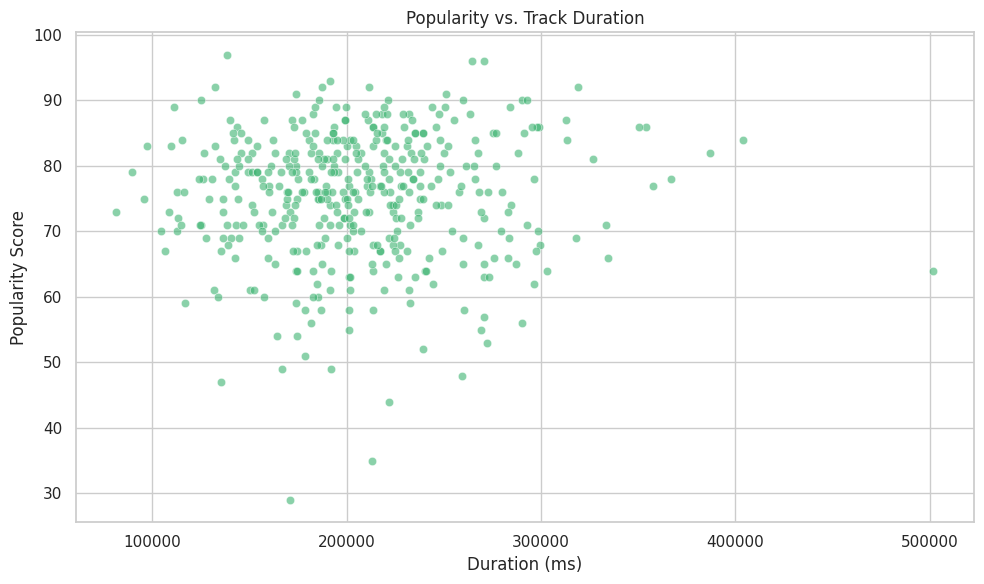

In [22]:
#3 Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=spotify_df, x='Duration (ms)', y='Popularity', color='mediumseagreen', alpha=0.6)
plt.title("Popularity vs. Track Duration")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity Score")
plt.grid(True)
plt.tight_layout()
plt.show()


Artist with the most tracks: Drake (17 tracks)


<ipython-input-23-8ef7b1190c1a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


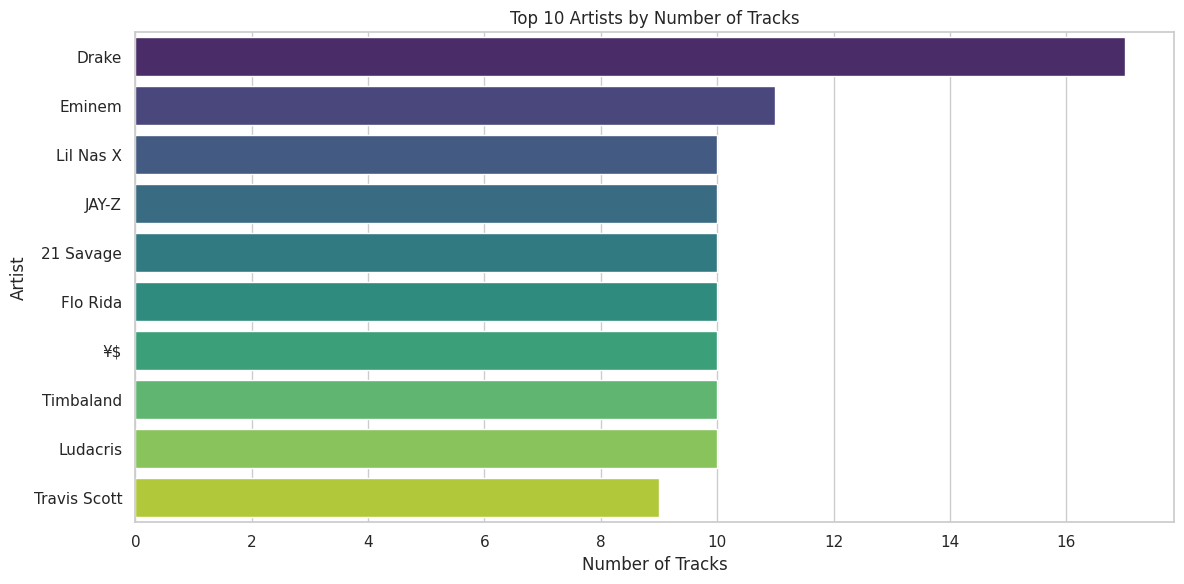

In [23]:
#4 Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of tracks per artist
artist_track_counts = spotify_df['Artist'].value_counts()

# Display top 10 artists with the most tracks
top_artists = artist_track_counts.head(10)

# Print the artist with the most tracks
most_tracks_artist = top_artists.idxmax()
print(f"Artist with the most tracks: {most_tracks_artist} ({top_artists.max()} tracks)")

# Plot the top 10 as a countplot
plt.figure(figsize=(12,6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title("Top 10 Artists by Number of Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()


In [24]:
#5 What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
# Sort the DataFrame by 'Popularity' in ascending order to get least popular tracks
least_popular_tracks = spotify_df[['Artist', 'Track Name', 'Popularity']] \
    .sort_values(by='Popularity', ascending=True) \
    .drop_duplicates() \
    .head(5)

# Display the result
print("Top 5 Least Popular Tracks in the Dataset:\n")
print(least_popular_tracks.reset_index(drop=True))


Top 5 Least Popular Tracks in the Dataset:

           Artist                     Track Name  Popularity
0          Pressa  Attachments (feat. Coi Leray)          29
1   Justin Bieber                     Intentions          35
2  French Montana                Splash Brothers          44
3        Lil Baby                  On Me - Remix          47
4     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [25]:
#6 Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
# Step 1: Identify the top 5 artists by number of tracks
top_5_artists = spotify_df['Artist'].value_counts().head(5).index.tolist()

# Step 2: Filter the DataFrame for those artists
top_artists_df = spotify_df[spotify_df['Artist'].isin(top_5_artists)]

# Step 3: Calculate average popularity for each of the top 5 artists
avg_popularity_by_artist = top_artists_df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).round(2)

# Display the result
print("Average Popularity of Top 5 Most Frequent Artists:\n")
print(avg_popularity_by_artist)


Average Popularity of Top 5 Most Frequent Artists:

Artist
21 Savage    83.80
Eminem       83.64
Drake        82.88
JAY-Z        77.90
Lil Nas X    75.90
Name: Popularity, dtype: float64


In [26]:
#7 For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
# Step 1: Get top 5 artists by number of tracks
top_5_artists = spotify_df['Artist'].value_counts().head(5).index

# Step 2: Filter only these artists
top_artists_df = spotify_df[spotify_df['Artist'].isin(top_5_artists)]

# Step 3: For each artist, get the track with the highest popularity
most_popular_tracks = top_artists_df.sort_values(['Artist', 'Popularity'], ascending=[True, False]) \
    .drop_duplicates(subset='Artist') \
    [['Artist', 'Track Name', 'Popularity']]

# Display results
print("Most Popular Track for Each of the Top 5 Artists:\n")
print(most_popular_tracks.reset_index(drop=True))


Most Popular Track for Each of the Top 5 Artists:

      Artist                               Track Name  Popularity
0  21 Savage                                   redrum          96
1      Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
2     Eminem                               Without Me          90
3      JAY-Z                          Ni**as In Paris          86
4  Lil Nas X                        THATS WHAT I WANT          81


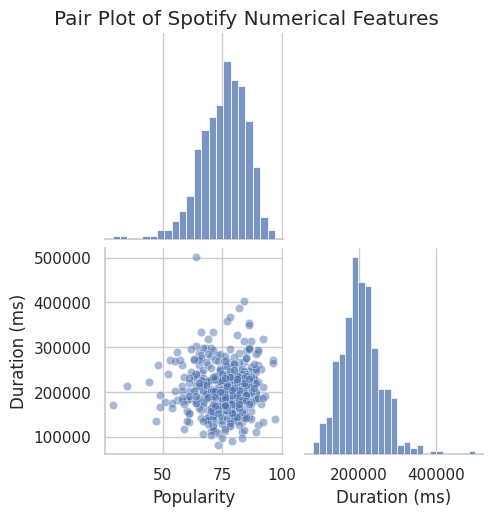

In [27]:
#8 Visualize relationships between multiple numerical variables simultaneously using a pair plot
import seaborn as sns
import matplotlib.pyplot as plt

# Select only relevant numeric columns
numeric_cols = ['Popularity', 'Duration (ms)']

# Create a pairplot
sns.pairplot(spotify_df[numeric_cols], corner=True, plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Spotify Numerical Features", y=1.02)
plt.show()


<ipython-input-28-c35bd7de0dc1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_df, x='Artist', y='Duration (ms)', palette='pastel')


<Axes: xlabel='Artist', ylabel='Duration (ms)'>

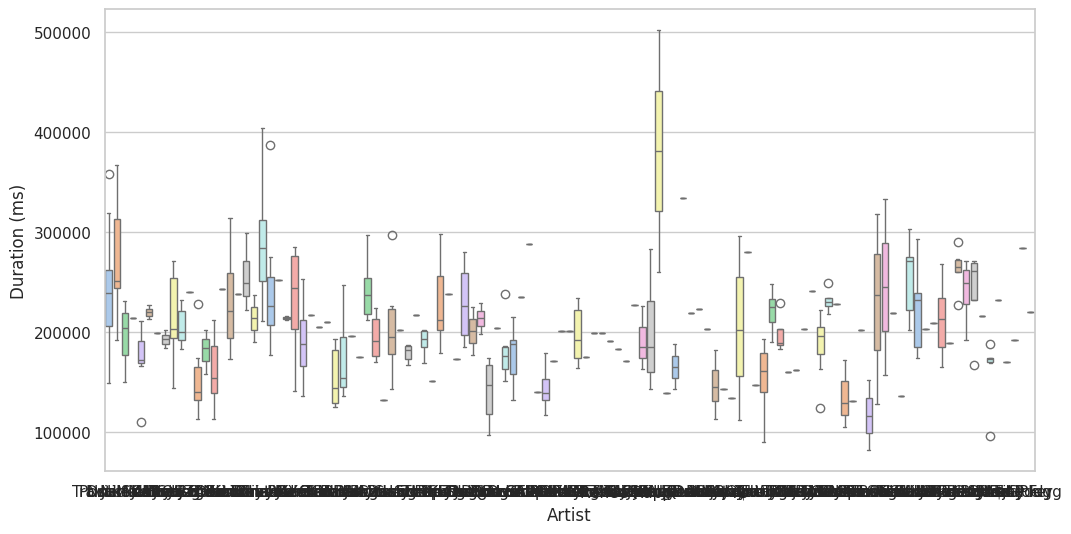

In [28]:
#9 Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=spotify_df, x='Artist', y='Duration (ms)', palette='pastel')

<ipython-input-29-202c9848936a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=spotify_df, x='Artist', y='Popularity', palette='pastel')


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

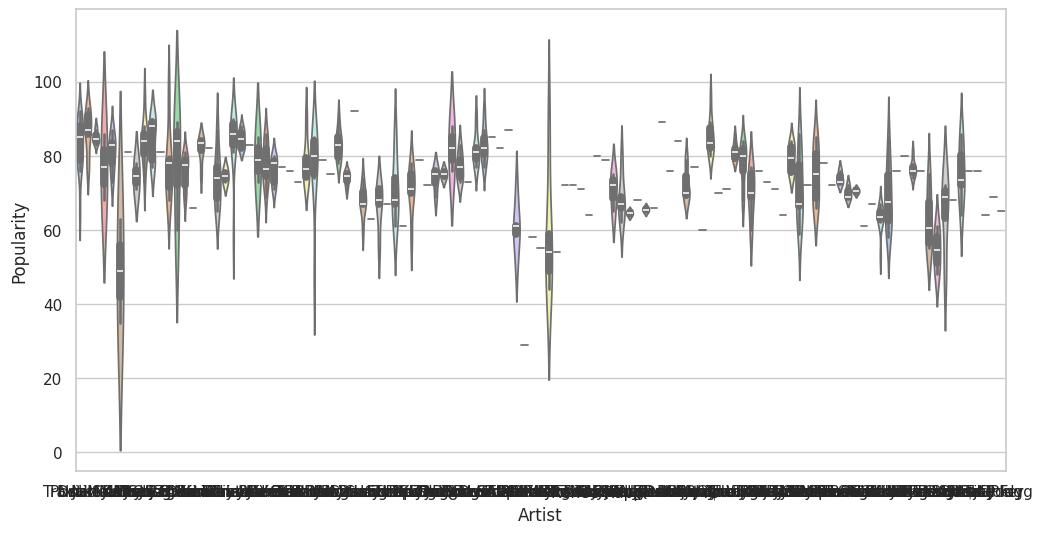

In [29]:
#10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
import seaborn as sns
import matplotlib.pyplot as plt

# Create a swarm plot
plt.figure(figsize=(12,6))
sns.violinplot(data=spotify_df, x='Artist', y='Popularity', palette='pastel')
plt